# Data 620 - Week 3 Assignment

Nicholas Schettini and Amanda Arce

This week's assignment is to:

Load a graph of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.
Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
Use a visualization tool of your choice (NetworkX or some other tool) to display information.
Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

The dataset is taken from the https://snap.stanford.edu/data/ repository of datasets.  We decided it would be interesting to analyze the ego-Facebook dataset.  The Type is "Undirected", the # of nodes consist of 4,039.  The # of edges consist of 88,234.  The description for this dataset is: "Social circles from Facebook (anonymized).  

Facebook has a huge impact of todays society - from keeping up with family and friends, to networking with people around the country. We thought it would be interesting to take a look and see what the data might show us.

The link to the actual dataset is: https://snap.stanford.edu/data/ego-Facebook.html

### Link to YouTube video: 

In [ ]:
http://somup.com/cqQDYqekcv

### Libraries

First we load in the required libraries for the analysis. 

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
%matplotlib inline

Now that our libraries are loaded, we can import our data into Python using the pandas function: read_table()

In order to load in our data, we needed to first convert the .gz zip type file into a readable format.  The below code converts the file and reads it into a pandas dataframe

In [116]:
df = pd.read_table('C:/Users/nicsc/Documents/facebook_combined.txt.gz', 
                 compression='infer', 
                 header=0, sep=' ',
                 names = ['source','target'])

In [117]:
df.head()

,source,target
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6


In [118]:
df.shape

(88233, 2)

As we can see, we have 88,234 rows (edge list) worth of data.  We're going to create a subset of this data to work with. We'll work with 100 rows of data, between rows 400-500.

In [119]:
df = df[300:400]
df.shape

(100, 2)

In [120]:
df.head()

,source,target
300,0,302
301,0,303
302,0,304
303,0,305
304,0,306


Lets now take a look at some basic graph information

In [121]:
G = nx.from_pandas_edgelist(df)


In [122]:
print(nx.info(G))
nx.algorithms.diameter(G)

Name: 
Type: Graph
Number of nodes: 94
Number of edges: 100
Average degree:   2.1277


8

#### Graph Diameter: 

A graph's diameter is the "largest # of vertices that must be traversed in order to travel from one vertex to another". in this case, the diameter is 8.

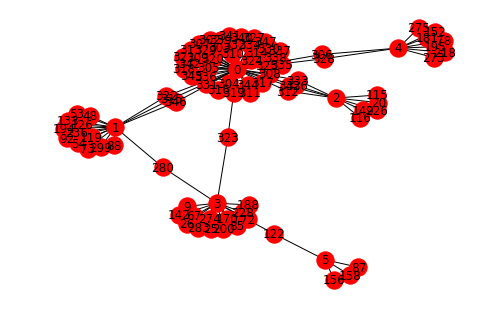

In [123]:
nx.draw(G, with_labels=True)
plt.show()

#### Graph Distance

The graph distance is the shortest path that one must walk from A to B.  Also known as the "simplest measure of distance".

Nodes 5 and 4 seem to be the furthest from each other - lets take a look at the shortest distance between them.  to traverse from nodes 5 to 4, one must pass through 5 other nodes. 

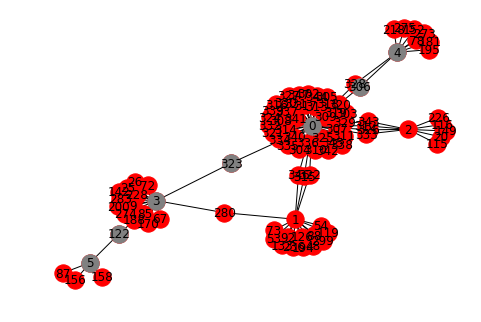

In [124]:
path = nx.shortest_path(G,source=5,target=4)

pos = nx.spring_layout(G)

nx.draw(G, pos, node_color='red', with_labels=True)
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='grey')
plt.show()